In [1]:
%run SPCP.ipynb
%run functions.ipynb
%run DFM_class.ipynb


 install fbpca first: `pip install fbpca` 



In [2]:
X,Gamma,F,loading,f=generate_test_data(100,1000,prt=True)
X.shape

off_diagonal sum= 1.8642032169417462


(100, 1000)

In [3]:
common=Gamma@F

In [4]:
#add outlier
S=np.zeros(X.shape)
for i in range(X.shape[0]):
    outlier=np.random.randn()*20
    col=np.random.randint(0,100)
    row=np.random.randint(0,1000)
    S[col,row]=outlier

In [5]:
from numpy.linalg import svd
print(svd(X)[1])
print(svd(common)[1])
print(svd(X+S)[1])
print(svd(common+S)[1])

[77.43406107 67.98969985 62.1685647  52.49447841 42.41385347  8.81739258
  8.75319947  8.70223989  8.62872125  8.55210059  8.50231085  8.49694123
  8.40433511  8.33730847  8.27726803  8.24079253  8.18512539  8.1039413
  8.04734196  8.01306931  7.99606344  7.91449271  7.85826951  7.81047271
  7.80195746  7.77551799  7.68369093  7.66566935  7.5964494   7.57974744
  7.52668075  7.48689667  7.46722858  7.43431891  7.38596239  7.37132896
  7.35481683  7.3135323   7.28512863  7.25939022  7.19828155  7.15087653
  7.12201086  7.09276049  7.0615824   7.02443819  7.01522917  6.94126477
  6.89789698  6.85562759  6.79007584  6.77982072  6.71313396  6.67564272
  6.66559205  6.61962285  6.59629618  6.58255066  6.52982286  6.49118652
  6.45343213  6.40994301  6.37063624  6.33654989  6.29877901  6.26899855
  6.25264627  6.20860477  6.18615122  6.15202711  6.09595663  6.0788586
  6.02185705  6.00142199  5.97766823  5.94067428  5.88245216  5.84959029
  5.82178627  5.7698016   5.73391205  5.67457454  5.6

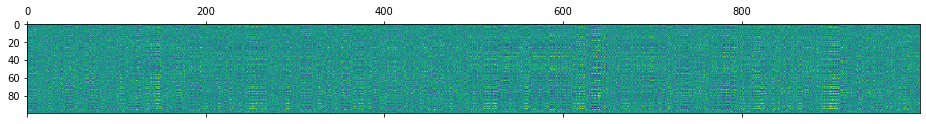

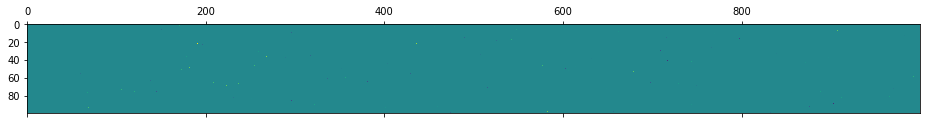

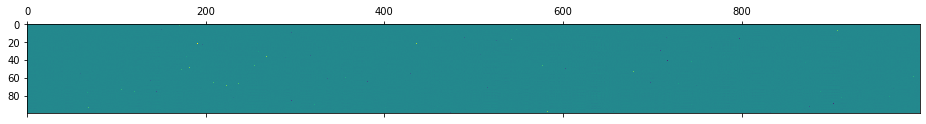

In [11]:
plt.matshow(X)
plt.matshow(S)
plt.matshow(X+S)

In [14]:
#spcp=StablePCP()
#spcp.fit(X+S)
L=spcp.get_low_rank()
E=spcp.get_sparse()
print(spcp.rank)

4


In [8]:
print(svd(L)[1])

[3.25805796e+01 2.31809755e+01 1.73504873e+01 7.65810435e+00
 1.33019687e-14 9.71966903e-15 7.00898592e-15 3.91575822e-15
 2.85225535e-15 2.85225535e-15 2.85225535e-15 2.85225535e-15
 2.85225535e-15 2.85225535e-15 2.85225535e-15 2.85225535e-15
 2.85225535e-15 2.85225535e-15 2.85225535e-15 2.85225535e-15
 2.85225535e-15 2.85225535e-15 2.85225535e-15 2.85225535e-15
 2.85225535e-15 2.85225535e-15 2.85225535e-15 2.85225535e-15
 2.85225535e-15 2.85225535e-15 2.85225535e-15 2.85225535e-15
 2.85225535e-15 2.85225535e-15 2.85225535e-15 2.85225535e-15
 2.85225535e-15 2.85225535e-15 2.85225535e-15 2.85225535e-15
 2.85225535e-15 2.85225535e-15 2.85225535e-15 2.85225535e-15
 2.85225535e-15 2.85225535e-15 2.85225535e-15 2.85225535e-15
 2.85225535e-15 2.85225535e-15 2.85225535e-15 2.85225535e-15
 2.85225535e-15 2.85225535e-15 2.85225535e-15 2.85225535e-15
 2.85225535e-15 2.85225535e-15 2.85225535e-15 2.85225535e-15
 2.85225535e-15 2.85225535e-15 2.85225535e-15 2.85225535e-15
 2.85225535e-15 2.852255

In [22]:
print(svd(X+S-E)[1])

[77.30193908 67.90233502 62.07184687 52.37946383 42.35828707  9.02435061
  8.97857195  8.87685226  8.84208962  8.76522472  8.70431621  8.67845919
  8.58162524  8.52146593  8.4517136   8.41834247  8.37355214  8.30925533
  8.29074024  8.23031291  8.17294518  8.0629427   8.02671613  7.98835176
  7.97348044  7.94567852  7.89661589  7.82961036  7.76942671  7.73123055
  7.68766875  7.65186549  7.5970225   7.55432914  7.53780455  7.510213
  7.49874861  7.45730767  7.38967458  7.37318607  7.35556282  7.2974717
  7.25416071  7.17393595  7.16692552  7.13719983  7.11512123  7.10285575
  7.05600582  6.96037172  6.92201031  6.91602555  6.85901017  6.78963039
  6.77923774  6.73232959  6.73186992  6.65834094  6.63399944  6.59881886
  6.56447973  6.53691729  6.49884795  6.47719417  6.4100685   6.37882457
  6.34195379  6.32975634  6.321224    6.285669    6.2316032   6.18187109
  6.17449206  6.1217897   6.07989473  6.01298488  5.99428208  5.976522
  5.90226206  5.86353878  5.83356685  5.81652665  5.7750

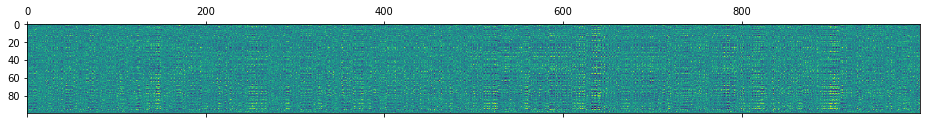

In [31]:
plt.matshow(X+S-E)

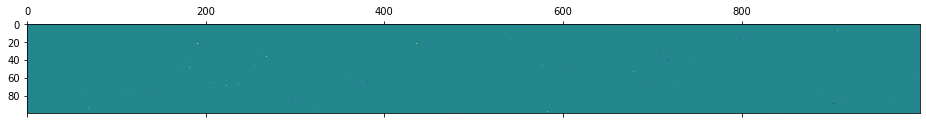

In [13]:
plt.matshow(E)

In [32]:
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(X,X+S))
print(mean_absolute_error(X,X+S-E))
print(mean_absolute_error(S,E))

0.016145969273747198
0.0015281381149957662
0.001528138114995766
0.016145969273747198


In [23]:
print(mean_absolute_error(Gamma@F,X+S-E))

0.17458053336619317


In [25]:
mae=[]
model=DFM(X+S-E,5,5)
#initialize parameter using pca
model.pca()
#map model to stacked form
model.to_state_space_rep()
#EM estimation, loglikylihood is returned and saved to ll.

ll=model.em(max_iter=1000)
y_true=F[:,model.lag-1:]
y_pred=model.stacked_factor[:5]
for i in range(5):
    if r2_score(y_true[i], y_pred[i])<r2_score(y_true[i], -y_pred[i]):
        y_pred[i]=-y_pred[i]
mae.append(mean_absolute_error(y_true.T, y_pred.T))

In [26]:
mae

[0.18255619023911202]

r2= 0.9907695787656935
r2= 0.9877964629611006
r2= 0.9864727038034391
r2= 0.9818581371448287
r2= 0.9700653234288779


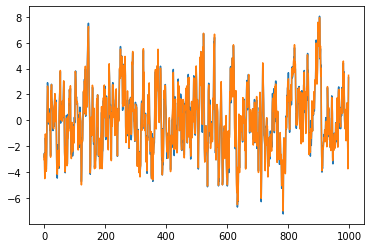

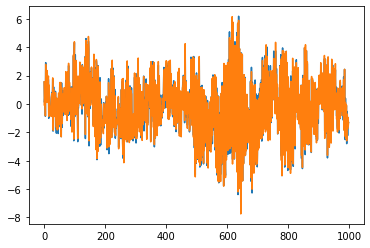

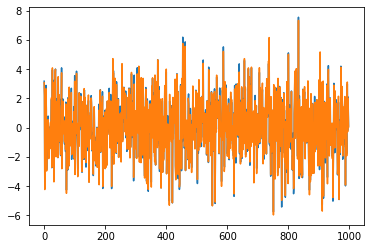

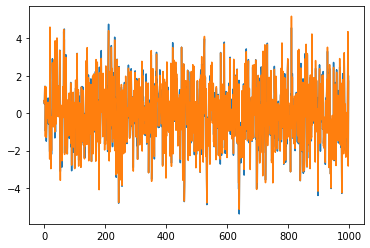

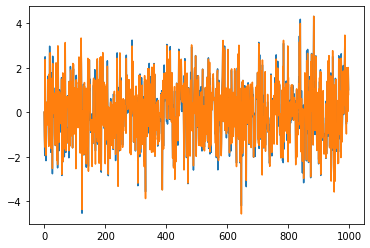

In [27]:
compare_factor_plot(y_true,y_pred)

In [28]:
model=DFM(X,5,5)
#initialize parameter using pca
model.pca()
#map model to stacked form
model.to_state_space_rep()
#EM estimation, loglikylihood is returned and saved to ll.

ll=model.em(max_iter=1000)
y_true=F[:,model.lag-1:]
y_pred=model.stacked_factor[:5]
for i in range(5):
    if r2_score(y_true[i], y_pred[i])<r2_score(y_true[i], -y_pred[i]):
        y_pred[i]=-y_pred[i]
mae.append(mean_absolute_error(y_true.T, y_pred.T))

In [29]:
mae

[0.18255619023911202, 0.17668919216282325]

r2= 0.9912451657735889
r2= 0.9886851853316061
r2= 0.9874550969319138
r2= 0.9828914402468936
r2= 0.9710769273872304


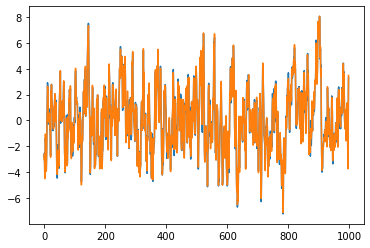

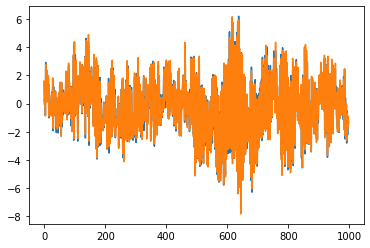

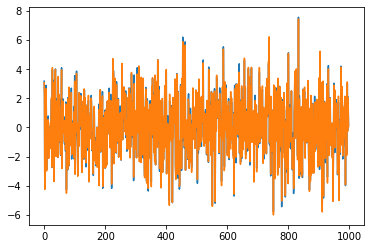

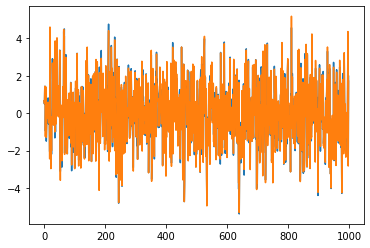

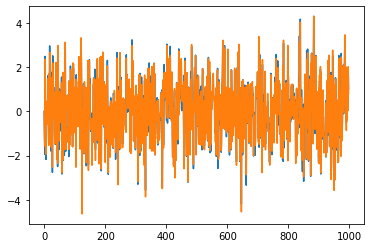

In [30]:
compare_factor_plot(y_true,y_pred)